<a href="https://colab.research.google.com/github/ronykroy/NLP/blob/master/NLP_seq2seq_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## They never really tell you how to clean the data do they...?

In [1]:
! wget https://snap.stanford.edu/data/finefoods.txt.gz

--2019-11-06 02:58:43--  https://snap.stanford.edu/data/finefoods.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122104202 (116M) [application/x-gzip]
Saving to: ‘finefoods.txt.gz’

finefoods.txt.gz    100%[===================>] 116.45M  35.6MB/s    in 4.0s    

2019-11-06 02:58:47 (28.8 MB/s) - ‘finefoods.txt.gz’ saved [122104202/122104202]



In [0]:
! gunzip finefoods.txt.gz

In [3]:
ls

finefoods.txt  sample_data/


In [0]:
with open('finefoods.txt', 'r',encoding = 'latin') as infile:
    lines = [line for line in infile]

In [0]:
import pandas as pd

In [6]:
len(lines)

5116093

In [0]:
lines_cleaned = [l.rstrip("\n\r") for l in lines]

In [0]:
 ind_start = [i for i, s in enumerate(lines_cleaned) if 'product/productId' in s]

In [0]:
ind_end = [i for i, s in enumerate(lines_cleaned) if 'review/text' in s]

In [10]:
len(ind_start); ind_start[:10]

[0, 9, 18, 27, 36, 45, 54, 63, 72, 81]

In [11]:
len(ind_end);ind_end[:10]

[7, 16, 25, 34, 43, 52, 61, 70, 79, 88]

In [0]:
#a = zip(ind_start,ind_end)

In [13]:
pd_list=[]
for i in range(len(ind_end)):
  try:
    dict_2={} # empty dict
    c = lines_cleaned[ind_start[i]:ind_end[i]+1]
    for entry in c:
      d = entry.split(': ')
      dict_2[d[0].split('/')[1]] = d[1]
    
    pd_list.append(dict_2)
  except IndexError as index_error:
    print('index error occurred for',c)
    print('at entry',entry)
    print('at index',ind_start[i])
    pass

index error occurred for ['product/productId: B002RIZUQ2', 'review/userId: AS2DLXUWDK0GP', 'review/profileName: MABEL "Tell us about yourself!', '88 years old. ...', 'review/helpfulness: 1/1', 'review/score: 4.0', 'review/time: 1289088000', 'review/summary: delicious', "review/text: if you prefer a tasteful and less strong flavored coffee, I reommend Green Mountain's hazelnut.  I have not been a coffee drinker, but upon tasting this brew, I drink it daily."]
at entry 88 years old. ...
at index 847773
index error occurred for ['product/productId: B004FEJ968', 'review/userId: ALDIU41MJLTZA', 'review/profileName: Don Snyder "The Idea Guy', '...creative powers b...', 'review/helpfulness: 0/0', 'review/score: 3.0', 'review/time: 1308182400', 'review/summary: Less would have been more', "review/text: The taste of the Newton's Fruit Thins was pretty good. It's a nice crunchy treat, and I really enjoyed the cranberry citrus and oat flavor. It was like a really thin and crisp designer oatmeal c

In [14]:
len(ind_end)

568454

In [15]:
len(pd_list) # close enuf

568447

In [16]:
len(ind_end) -len(pd_list) # exactly the number of times the index eror popped up

7

In [0]:
#pd_list[:3]

In [0]:
df = pd.DataFrame(pd_list)

In [0]:
#https://www.analyticsvidhya.com/blog/2019/06/comprehensive-guide-text-summarization-using-deep-learning-python

## Data cleaning

In [20]:
df.columns

Index(['productId', 'userId', 'profileName', 'helpfulness', 'score', 'time',
       'summary', 'text'],
      dtype='object')

In [0]:
df.drop_duplicates(subset=['text'],inplace=True)  #dropping duplicates
df.dropna(axis=0,inplace=True)   #dropping na

In [0]:
# a patently ridiculoud pre processing step 

In [0]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                            "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                            "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                            "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                            "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                            "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                            "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                            "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                            "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                            "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                            "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                            "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                            "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                            "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                            "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                            "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                            "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                            "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                            "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                            "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                            "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                            "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                            "you're": "you are", "you've": "you have"} 

In [24]:
df['text'][:2]

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
Name: text, dtype: object

## I can has the code

In [25]:
%tensorflow_version 2.x 
# enforce 2.x compliance anyway

TensorFlow 2.x selected.


In [26]:
import numpy as np  
import pandas as pd 
import re           
from bs4 import BeautifulSoup 
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords   
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore") 


Using TensorFlow backend.


In [27]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop_words = set(stopwords.words('english')) 
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text # there were links in the original data seth that might have been a ready made .csv file..?
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    tokens = [w for w in newString.split() if not w in stop_words]
    long_words=[]
    for i in tokens:
        if len(i)>=3:                  #removing short word
            long_words.append(i)   
    return (" ".join(long_words)).strip()

cleaned_text = []
for t in df['text']:
    cleaned_text.append(text_cleaner(t))

In [29]:
df['summary'][:2]

0    Good Quality Dog Food
1        Not as Advertised
Name: summary, dtype: object

In [0]:
def summary_cleaner(text):
    newString = re.sub('"','', text)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString)
    newString = newString.lower()
    tokens=newString.split()
    newString=''
    for i in tokens:
        if len(i)>1:                                 
            newString=newString+i+' '  
    return newString

#Call the above function
cleaned_summary = []
for t in df['summary']:
    cleaned_summary.append(summary_cleaner(t))


In [0]:
df['cleaned_text']=cleaned_text
df['cleaned_summary']=cleaned_summary
df['cleaned_summary'].replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

In [32]:
df.head()

,productId,userId,profileName,helpfulness,score,time,summary,text,cleaned_text,cleaned_summary
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labr...,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,good quality dog food
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,"Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as ""Jumbo"".",product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,not as advertised
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all","This is a confection that has been around a few centuries. It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with ...",confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,delight says it all
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient in Robitussin I believe I have found it. I got this in addition to the Root Beer Extract I ordered (which was good) and made some cherry soda. The fl...,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,cough medicine
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,"Great taffy at a great price. There was a wide assortment of yummy taffy. Delivery was very quick. If your a taffy lover, this is a deal.",great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,great taffy


In [0]:
df['cleaned_summary'] = df['cleaned_summary'].apply(lambda x : '_START_ '+ x + ' _END_')
# spl tokens

In [34]:
for i in range(5):
    print("Review:",df['cleaned_text'][i])
    print("Summary:",df['cleaned_summary'][i])
    print("\n")

Review: bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better
Summary: _START_ good quality dog food  _END_


Review: product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo
Summary: _START_ not as advertised  _END_


Review: confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch
Summary: _START_ delight says it all  _END_


Review: looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal
Summary: _START_ cough medicine  _END_


Review: great taffy great price wide assortment yummy taffy delivery quick taffy lo

In [35]:
df[['cleaned_text','cleaned_summary']].head()

,cleaned_text,cleaned_summary
0,bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better,_START_ good quality dog food _END_
1,product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo,_START_ not as advertised _END_
2,confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat famil...,_START_ delight says it all _END_
3,looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal,_START_ cough medicine _END_
4,great taffy great price wide assortment yummy taffy delivery quick taffy lover deal,_START_ great taffy _END_


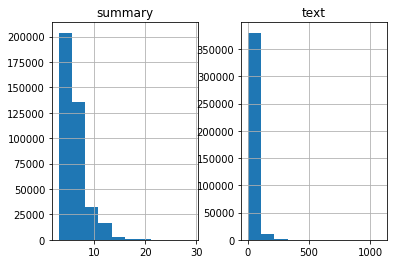

In [36]:
import matplotlib.pyplot as plt
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in df['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in df['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count, 'summary':summary_word_count})
length_df.hist(bins = 10)
plt.show()

In [0]:
# summary : limit it to 10 there is a drop at 10 check histogram
# text 125 is ok...
max_len_text=125 
max_len_summary=10

In [0]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val = train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 
# train is the cleaned text, val is the cleaned summary
# *args


## NLP part

In [39]:
pd.DataFrame(x_tr).head() # just a dekko

,cleaned_text
386865,tea exactly wanted rich warm spicy cinnamon tea tea well packaged cannot even smell tea bag without opening foil pouches means keeping tea fresh brewed tea hot milk also nice cinnamon milk tea per...
334183,bought case costco crackers cheese good every single package crackers cheese cheese missing rip like filled completely save cheese pay something expect product full air never buy product understand
302448,tea tea brand pre made tea found enjoy drink white jasmine oolong varieties glad amazon offers free shipping tea expensive
143695,kraft macaroni cheese beckons back lonely days running home lunchtime lay heart strewn crying harsh rejection meted upon fairest playground beauties soft noodles cheese cream sauce would ease ache...
120805,way sweet taste like hot sugar water coffee back ground taste sorry bought nothing like get coffe shop waste money


In [0]:
#prepare a tokenizer for reviews on training data # see we avoid using it on the 
x_tokenizer = Tokenizer()
x_tokenizer.fit_on_texts(list(x_tr))

#convert text sequences into integer sequences
x_tr    =   x_tokenizer.texts_to_sequences(x_tr) 
x_val   =   x_tokenizer.texts_to_sequences(x_val)

#padding zero upto maximum length
x_tr    =   pad_sequences(x_tr,  maxlen=max_len_text, padding='post') 
x_val   =   pad_sequences(x_val, maxlen=max_len_text, padding='post')

x_voc_size   =  len(x_tokenizer.word_index) +1

In [0]:
#preparing a tokenizer for summary on training data 
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(y_tr))

#convert summary sequences into integer sequences
y_tr    =   y_tokenizer.texts_to_sequences(y_tr) 
y_val   =   y_tokenizer.texts_to_sequences(y_val) 

#padding zero upto maximum length
y_tr    =   pad_sequences(y_tr, maxlen=max_len_summary, padding='post')
y_val   =   pad_sequences(y_val, maxlen=max_len_summary, padding='post')

y_voc_size  =   len(y_tokenizer.word_index) +1

In [42]:
print(y_voc_size, x_voc_size)

30963 108950


## the Attention layer
https://github.com/thushv89/attention_keras/blob/master/layers/attention.py

In [0]:
import tensorflow as tf
import os
from tensorflow.python.keras.layers import Layer
from tensorflow.python.keras import backend as K


class AttentionLayer(Layer):
    """
    This class implements Bahdanau attention (https://arxiv.org/pdf/1409.0473.pdf).
    There are three sets of weights introduced W_a, U_a, and V_a
     """

    def __init__(self, **kwargs):
        super(AttentionLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        assert isinstance(input_shape, list)
        # Create a trainable weight variable for this layer.

        self.W_a = self.add_weight(name='W_a',
                                   shape=tf.TensorShape((input_shape[0][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.U_a = self.add_weight(name='U_a',
                                   shape=tf.TensorShape((input_shape[1][2], input_shape[0][2])),
                                   initializer='uniform',
                                   trainable=True)
        self.V_a = self.add_weight(name='V_a',
                                   shape=tf.TensorShape((input_shape[0][2], 1)),
                                   initializer='uniform',
                                   trainable=True)

        super(AttentionLayer, self).build(input_shape)  # Be sure to call this at the end

    def call(self, inputs, verbose=False):
        """
        inputs: [encoder_output_sequence, decoder_output_sequence]
        """
        assert type(inputs) == list
        encoder_out_seq, decoder_out_seq = inputs
        if verbose:
            print('encoder_out_seq>', encoder_out_seq.shape)
            print('decoder_out_seq>', decoder_out_seq.shape)

        def energy_step(inputs, states):
            """ Step function for computing energy for a single decoder state """

            assert_msg = "States must be a list. However states {} is of type {}".format(states, type(states))
            assert isinstance(states, list) or isinstance(states, tuple), assert_msg

            """ Some parameters required for shaping tensors"""
            en_seq_len, en_hidden = encoder_out_seq.shape[1], encoder_out_seq.shape[2]
            de_hidden = inputs.shape[-1]

            """ Computing S.Wa where S=[s0, s1, ..., si]"""
            # <= batch_size*en_seq_len, latent_dim
            reshaped_enc_outputs = K.reshape(encoder_out_seq, (-1, en_hidden))
            # <= batch_size*en_seq_len, latent_dim
            W_a_dot_s = K.reshape(K.dot(reshaped_enc_outputs, self.W_a), (-1, en_seq_len, en_hidden))
            if verbose:
                print('wa.s>',W_a_dot_s.shape)

            """ Computing hj.Ua """
            U_a_dot_h = K.expand_dims(K.dot(inputs, self.U_a), 1)  # <= batch_size, 1, latent_dim
            if verbose:
                print('Ua.h>',U_a_dot_h.shape)

            """ tanh(S.Wa + hj.Ua) """
            # <= batch_size*en_seq_len, latent_dim
            reshaped_Ws_plus_Uh = K.tanh(K.reshape(W_a_dot_s + U_a_dot_h, (-1, en_hidden)))
            if verbose:
                print('Ws+Uh>', reshaped_Ws_plus_Uh.shape)

            """ softmax(va.tanh(S.Wa + hj.Ua)) """
            # <= batch_size, en_seq_len
            e_i = K.reshape(K.dot(reshaped_Ws_plus_Uh, self.V_a), (-1, en_seq_len))
            # <= batch_size, en_seq_len
            e_i = K.softmax(e_i)

            if verbose:
                print('ei>', e_i.shape)

            return e_i, [e_i]

        def context_step(inputs, states):
            """ Step function for computing ci using ei """
            # <= batch_size, hidden_size
            c_i = K.sum(encoder_out_seq * K.expand_dims(inputs, -1), axis=1)
            if verbose:
                print('ci>', c_i.shape)
            return c_i, [c_i]

        def create_inital_state(inputs, hidden_size):
            # We are not using initial states, but need to pass something to K.rnn funciton
            fake_state = K.zeros_like(inputs)  # <= (batch_size, enc_seq_len, latent_dim
            fake_state = K.sum(fake_state, axis=[1, 2])  # <= (batch_size)
            fake_state = K.expand_dims(fake_state)  # <= (batch_size, 1)
            fake_state = K.tile(fake_state, [1, hidden_size])  # <= (batch_size, latent_dim
            return fake_state

        fake_state_c = create_inital_state(encoder_out_seq, encoder_out_seq.shape[-1])
        fake_state_e = create_inital_state(encoder_out_seq, encoder_out_seq.shape[1])  # <= (batch_size, enc_seq_len, latent_dim

        """ Computing energy outputs """
        # e_outputs => (batch_size, de_seq_len, en_seq_len)
        last_out, e_outputs, _ = K.rnn(
            energy_step, decoder_out_seq, [fake_state_e],
        )

        """ Computing context vectors """
        last_out, c_outputs, _ = K.rnn(
            context_step, e_outputs, [fake_state_c],
        )

        return c_outputs, e_outputs

    def compute_output_shape(self, input_shape):
        """ Outputs produced by the layer """
        return [
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[1][2])),
            tf.TensorShape((input_shape[1][0], input_shape[1][1], input_shape[0][1]))
        ]

## Model building


1. Return Sequences = LSTM produces the hidden state and cell state for every timestep
2. Return State = True: LSTM produces the hidden state and cell state of the last timestep only
3. Initial State: This is used to initialize the internal states of the LSTM for the first timestep
3. Stacked LSTM: Stacked LSTM has multiple layers of LSTM modules stacked on top of each other. This leads to a better representation of the sequence.

In [44]:
from keras import backend as K 
import tensorflow as tf

tf.keras.backend.clear_session() 
latent_dim = 500 

# Encoder 
encoder_inputs = Input(shape=(max_len_text,)) 
enc_emb = Embedding(x_voc_size, latent_dim,trainable=True)(encoder_inputs) 

#LSTM 1 
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb) 

#LSTM 2 
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True) 
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1) 

#LSTM 3 
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True) 
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2) 

# Set up the decoder. 
decoder_inputs = Input(shape=(None,)) 
dec_emb_layer = Embedding(y_voc_size, latent_dim,trainable=True) 
dec_emb = dec_emb_layer(decoder_inputs) 

#LSTM using encoder_states as initial state
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True) 
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c]) 

#Attention Layer
attn_layer = AttentionLayer(name='attention_layer') 
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs]) 

# Concat attention output and decoder LSTM output 
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

#Dense layer
decoder_dense = TimeDistributed(Dense(y_voc_size, activation='softmax')) 
decoder_outputs = decoder_dense(decoder_concat_input) 

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs) 
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 125)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 125, 500)     54475000    input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 125, 500), ( 2002000     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

In [0]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
# remember sparse categorical entropy from bert for news groups
# takes care of the 1 hot encoding thing on the fly.. then as now

In [0]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1) # check the equivalent in the lr finder in fastai docs :)
# stops when val loss increases..

In [0]:
#pd.DataFrame(x_tr).head()

In [0]:
#pd.DataFrame(y_tr).head()

In [0]:
# do we need a warm up here..? https://colab.research.google.com/notebooks/gpu.ipynb#scrollTo=IVxrG3Osa1tM
# https://stackoverflow.com/questions/45063489/first-tf-session-run-performs-dramatically-different-from-later-runs-why/45067900#45067900
# port to a tPU.. with a ridiculous batch size 2048..?

In [49]:
history = model.fit( [x_tr,y_tr[:,:-1]], # x concatenated to y's all but last column is the input
                  y_tr.reshape(y_tr.shape[0],y_tr.shape[1], 1)[:,1:] , # output > y all columns barring the first
                  epochs=12, # was 50 ; an ungodly number
                  callbacks=[es],
                  batch_size=512, 
                  validation_data=([x_val,y_val[:,:-1]], # somewhat akin to ... given all this.. predict all of y and th last time step of y
                                   y_val.reshape(y_val.shape[0],y_val.shape[1], 1)[:,1:])) # the last time step of y wasn't included in the input data

Train on 353122 samples, validate on 39236 samples
Epoch 1/12
353122/353122 [==============================] - 2420s 7ms/sample - loss: 2.7288 - val_loss: 2.3258
Epoch 2/12
353122/353122 [==============================] - 2408s 7ms/sample - loss: 2.2316 - val_loss: 2.1209
Epoch 3/12
353122/353122 [==============================] - 2406s 7ms/sample - loss: 2.0706 - val_loss: 2.0405
Epoch 4/12
353122/353122 [==============================] - 2401s 7ms/sample - loss: 1.9709 - val_loss: 1.9987
Epoch 5/12
353122/353122 [==============================] - 2401s 7ms/sample - loss: 1.8933 - val_loss: 1.9793
Epoch 6/12
353122/353122 [==============================] - 2406s 7ms/sample - loss: 1.8257 - val_loss: 1.9743
Epoch 7/12
353122/353122 [==============================] - 2404s 7ms/sample - loss: 1.7638 - val_loss: 1.9708
Epoch 8/12
353122/353122 [==============================] - 2400s 7ms/sample - loss: 1.7048 - val_loss: 1.9762
Epoch 00008: early stopping


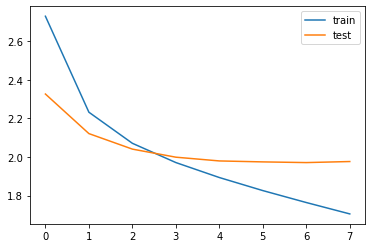

In [51]:
from matplotlib import pyplot 
pyplot.plot(history.history['loss'], label='train') 
pyplot.plot(history.history['val_loss'], label='test') 
pyplot.legend() 
pyplot.show()

In [0]:
#lookups
reverse_target_word_index=y_tokenizer.index_word 
reverse_source_word_index=x_tokenizer.index_word 
target_word_index=y_tokenizer.word_index

In [0]:
# encoder inference
encoder_model = Model(inputs=encoder_inputs,outputs=[encoder_outputs, state_h, state_c])

# decoder inference
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_hidden_state_input = Input(shape=(max_len_text,latent_dim))

# Get the embeddings of the decoder sequence
dec_emb2= dec_emb_layer(decoder_inputs)

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

#attention inference
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# A dense softmax layer to generate prob dist. over the target vocabulary
decoder_outputs2 = decoder_dense(decoder_inf_concat)

# Final decoder model
decoder_model = Model(
[decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
[decoder_outputs2] + [state_h2, state_c2]
)

In [0]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    e_out, e_h, e_c = encoder_model.predict(input_seq)

    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))

    # Chose the 'start' word as the first word of the target sequence
    target_seq[0, 0] = target_word_index['start']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        #print(sampled_token)
        #print('sampled_token_index is ',sampled_token_index)
        if(sampled_token=='end'):
          break     # found the end token...? break and get out...   
        else:
          decoded_sentence += ' '+sampled_token
          # Exit condition: either hit max length or find stop word.
          if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
            stop_condition = True
            
        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index
        #print('sampled_token_index is ',sampled_token_index)          
        # Update internal states
        e_h, e_c = h, c

    return decoded_sentence

In [0]:
def seq2summary(input_seq):
    newString=''
    for i in input_seq:
      if((i!=0 and i!=target_word_index['start']) and i!=target_word_index['end']):
        newString=newString+reverse_target_word_index[i]+' '
    return newString

def seq2text(input_seq):
    newString=''
    for i in input_seq:
      if(i!=0):
        newString=newString+reverse_source_word_index[i]+' '
    return newString
    

In [0]:
x_tr_pre,x_val_pre,y_tr_pre,y_val_pre = train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 
# For reaserch purposes...

In [148]:
for i in range(2,10):
  #print("Review before all manipulaitons:",x_val_pre.iloc[i])
  print("Review:",seq2text(x_val[i]))
  #print("Original summary before all manupilations:",y_val_pre.iloc[i])
  print("Original summary:",seq2summary(y_val[i]))
  print("Predicted summary:",decode_sequence(x_val[i].reshape(1,max_len_text)))
  print("\n")

Review: bought one pet store dog always try give natural minimally processed chews treats goes lot bully sticks pig ears himalayan chews label say made thought bully stick bit dried bull anatomy like large tendon nice odor free texture seemed unusual sort soft chewy like heavy dried dough tough durable like normal bully stick poo ate whole stick half hour looking online discovered natural meat man made fake bully stick ingredients 
Original summary: beware 
Predicted summary:  not for long lasting


Review: house goes least full boxes individually wrapped bowls oatmeal per week stepsons wolf packs per morning though consume oatmeal put fight fruit cream tend stick boxes often mix match dumping packed bananas cream packet strawberries cream mind two growing little boys eat much oatmeal want house could ask eat healthy snack thing nice year old make saturday mornings rooster crows come make oatmeal waits everyone else get adults oatmeal still tastes great requires lot less work remember 

The if/ else logic in the decode part had to be swapped...  
SHould have worked with the original logic.. but it didnt..   
clearer exit cases are encoded in its present form...   
Potential issue.. the review summarization is more than 9 words long.. in such a case it hits the  else block ... and lets see :)  

In [138]:
x_val[3].reshape(1,max_len_text)

array([[  296,   388,   285,   200,   261,  1139,   828,  1874,   380,
          199,   340, 47385,  4922,   501,   199,   216,   115,  1548,
          380,   103,  3109,   180,   269,   974,   497,   261,   395,
           57,  2138,  5571,   607,  2195,   269,   589,  1657,   269,
          566,    54,  1255,    20,  2165,    32,    15,   380,    68,
          296,    34,   947,    32,    97,   114,   125,    59,   174,
          111,    26,  4215,  2182, 11305, 18361,   211,    26,   380,
         7091,   348,   329,    12,  1971,   380,    61,    51,     4,
         1958,    81,    95,   132,   627,   734,   143,    20,   158,
          249,   146,   672,  1444,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0]],
      dtype

In [0]:
e_out, e_h, e_c = encoder_model.predict(x_val[2].reshape(1,max_len_text))

In [0]:
target_seq = np.zeros((1,1))
target_seq[0, 0] = target_word_index['start']

In [141]:
[target_seq] + [e_out, e_h, e_c]

[array([[1.]]),
 array([[[-8.86306465e-02,  7.48637915e-02,  1.75454188e-02, ...,
           6.81359619e-02,  3.57121639e-02,  2.11617813e-01],
         [-2.50726044e-02,  8.61673653e-02, -2.73068435e-02, ...,
           5.49225649e-03,  8.08247998e-02,  2.06475794e-01],
         [-8.43241927e-04,  2.88194534e-03, -3.94433469e-01, ...,
          -1.25412436e-04,  8.02913487e-01, -9.38009322e-02],
         ...,
         [ 9.61365222e-05, -7.80634764e-06,  5.31764177e-04, ...,
          -1.15908301e-02, -2.98146647e-03,  9.98509288e-01],
         [ 9.64012434e-05, -7.83594714e-06,  5.05767355e-04, ...,
          -1.15341172e-02, -2.97415839e-03,  9.98503864e-01],
         [ 9.66782245e-05, -7.84068288e-06,  4.84698423e-04, ...,
          -1.14802485e-02, -2.96699954e-03,  9.98498142e-01]]],
       dtype=float32),
 array([[ 9.66782245e-05, -7.84068288e-06,  4.84698423e-04,
         -1.26181799e-03,  2.61156589e-01, -9.60199177e-01,
          4.24184538e-02, -1.96841749e-04,  8.23017769e-0

In [0]:
output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

In [144]:
stop_condition = False
decoded_sentence = ''
while not stop_condition:
    output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
    # Sample a token
    sampled_token_index = np.argmax(output_tokens[0, -1, :])
    sampled_token = reverse_target_word_index[sampled_token_index]
    print(sampled_token)
    print('sampled_token_index is ',sampled_token_index)
    if(sampled_token=='end'):
      break        
    else:
      decoded_sentence += ' '+sampled_token
      # Exit condition: either hit max length or find stop word.
      if (sampled_token == 'end' or len(decoded_sentence.split()) >= (max_len_summary-1)):
        stop_condition = True
        
    # Update the target sequence (of length 1).
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = sampled_token_index
    print('sampled_token_index is ',sampled_token_index)          
    # Update internal states
    e_h, e_c = h, c

not
sampled_token_index is  6
sampled_token_index is  6
for
sampled_token_index is  7
sampled_token_index is  7
long
sampled_token_index is  261
sampled_token_index is  261
lasting
sampled_token_index is  813
sampled_token_index is  813
end
sampled_token_index is  2


In [0]:
reverse_target_word_index

In [0]:
np.argmax(output_tokens[0, -1, :])

In [0]:
sampled_token_index = np.argmax(output_tokens[0, -1, :])

In [122]:
reverse_target_word_index[sampled_token_index]

KeyError: ignored

In [0]:
x_tr_pre,x_val_pre,y_tr_pre,y_val_pre = train_test_split(df['cleaned_text'],df['cleaned_summary'],test_size=0.1,random_state=0,shuffle=True) 